# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
query_url = f"{url}{weather_api_key}&q="
print(query_url)

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        print(f"Processing Record for {city}")
    except KeyError:
        print("City not valid/found")
print("All cities processed")

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d2efa2a8b32e43a0906b5af9748e29e&q=
Processing Record for hwange
Processing Record for tamuin
Processing Record for dayong
Processing Record for ushuaia
Processing Record for saint-louis
Processing Record for souillac
Processing Record for lincoln
Processing Record for hobart
Processing Record for pitimbu
Processing Record for devgarh
Processing Record for rikitea
Processing Record for hilo
Processing Record for price
City not valid/found
Processing Record for qaanaaq
Processing Record for sao filipe
Processing Record for sao joao da barra
Processing Record for bahia de caraquez
Processing Record for muisne
Processing Record for nouadhibou
Processing Record for thiene
Processing Record for mount gambier
Processing Record for kapaa
Processing Record for sitka
Processing Record for hithadhoo
Processing Record for punta arenas
Processing Record for iskilip
Processing Record for east london
Processing Record for baran
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
weather_dict = {
    "City":city_name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}

In [36]:
#Display the DataFrame
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hwange,-18.3693,26.5019,60.57,37,1,2.66,ZW,1627235475
1,Tamuín,21.9833,-98.7500,90.07,56,6,4.59,MX,1627235475
2,Dayong,25.0209,118.2898,87.48,84,85,4.27,CN,1627235475
3,Ushuaia,-54.8000,-68.3000,35.26,93,90,26.46,AR,1627235306
4,Saint-Louis,16.3333,-15.0000,101.84,32,56,11.14,SN,1627235475


In [37]:
#Export the city data into a .csv.
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
weather_df.drop(weather_df[weather_df['Humidity'] > 100].index, inplace = True)

In [39]:
#  Get the indices of cities that have humidity over 100%.
very_humid_city = weather_df.loc[weather_df['Humidity'] > 100]
#No cities has over >100 humidity

In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

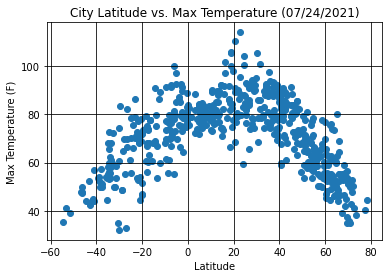

In [41]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature (07/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(color="black")
plt.savefig("Figures/lat_and_temp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

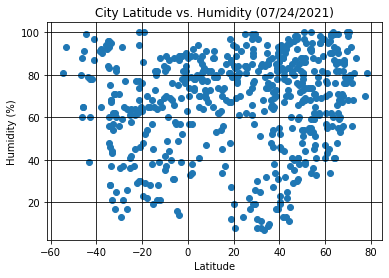

In [15]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"])
plt.title("City Latitude vs. Humidity (07/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="black")
plt.savefig("Figures/lat_and_humidity_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

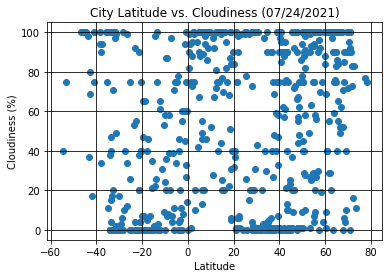

In [16]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (07/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (color="black")
plt.savefig("Figures/lat_and_cloud_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

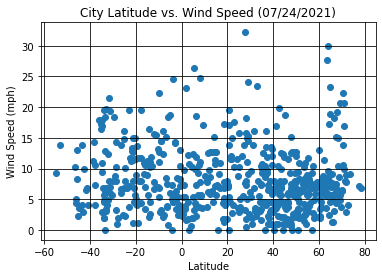

In [17]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed (07/24/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (color="black")
plt.savefig("Figures/lat_and_wind_plot.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [74]:
north_hem = weather_df[weather_df['Lat'] >=0]
north_hem = pd.DataFrame(north_hem)

The correlation between both factors is -0.7


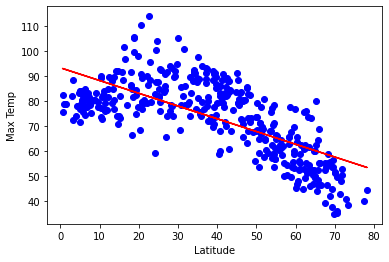

In [72]:
north_hem_temp = north_hem.iloc[:,3]
north_hem_lat = north_hem.iloc[:,1]
correlation = st.pearsonr(north_hem_temp,north_hem_lat)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = north_hem['Lat']
y_values = north_hem["Max Temp"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(north_hem['Lat'],north_hem["Max Temp"])
regress_values = north_hem['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(north_hem["Lat"],north_hem["Max Temp"],color='b')
plt.plot(north_hem["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-10,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [75]:
south_hem = weather_df[weather_df['Lat'] <=0]
south_hem = pd.DataFrame(south_hem)

The correlation between both factors is 0.73


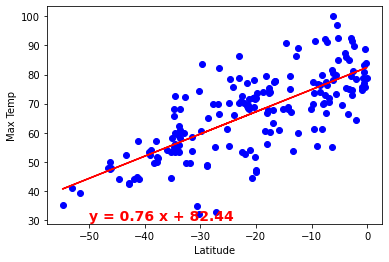

In [89]:
south_hem_temp = south_hem.iloc[:,3]
south_hem_lat = south_hem.iloc[:,1]
correlation = st.pearsonr(south_hem_temp,south_hem_lat)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = south_hem['Lat']
y_values = south_hem["Max Temp"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(south_hem['Lat'],south_hem["Max Temp"])
regress_values = south_hem['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(south_hem["Lat"],south_hem["Max Temp"],color='b')
plt.plot(south_hem["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-50,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.08


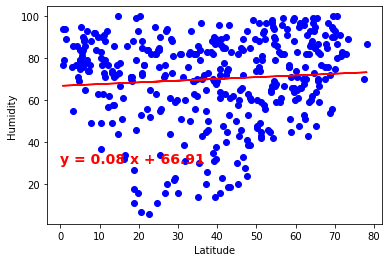

In [93]:
north_hem_hum = north_hem.iloc[:,4]
north_hem_lat = north_hem.iloc[:,1]
correlation = st.pearsonr(north_hem_hum,north_hem_lat) 
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = north_hem['Lat']
y_values = north_hem["Humidity"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(north_hem['Lat'],north_hem["Humidity"])
regress_values = north_hem['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(north_hem["Lat"],north_hem["Humidity"],color='b')
plt.plot(north_hem["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-0,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.09


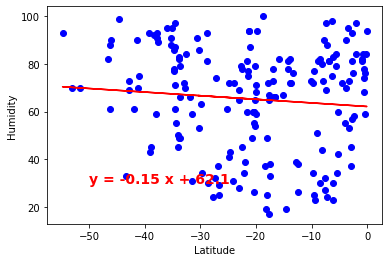

In [99]:
south_hem_hum = south_hem.iloc[:,4]
south_hem_lat = south_hem.iloc[:,1]
correlation = st.pearsonr(south_hem_hum,south_hem_lat)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = south_hem['Lat']
y_values = south_hem["Humidity"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(south_hem['Lat'],south_hem["Humidity"])
regress_values = south_hem['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(south_hem["Lat"],south_hem["Humidity"],color='b')
plt.plot(south_hem["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-50,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.08


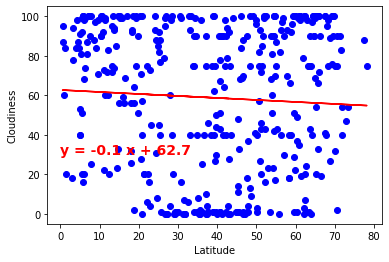

In [104]:
north_hem_cloud = north_hem.iloc[:,4]
north_hem_lat = north_hem.iloc[:,1]
correlation = st.pearsonr(north_hem_cloud,north_hem_lat)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = north_hem['Lat']
y_values = north_hem["Cloudiness"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(north_hem['Lat'],north_hem["Cloudiness"])
regress_values = north_hem['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(north_hem["Lat"],north_hem["Cloudiness"],color='b')
plt.plot(north_hem["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-0,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.09


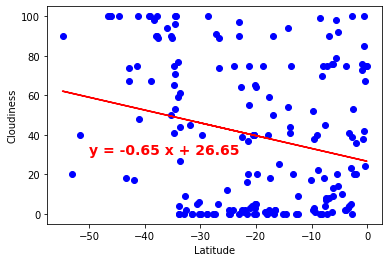

In [109]:
south_hem_cloud = south_hem.iloc[:,4]
south_hem_lat = south_hem.iloc[:,1]
correlation = st.pearsonr(south_hem_cloud,south_hem_lat)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = south_hem['Lat']
y_values = south_hem["Cloudiness"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(south_hem['Lat'],south_hem["Cloudiness"])
regress_values =south_hem['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(south_hem["Lat"],south_hem["Cloudiness"],color='b')
plt.plot(south_hem["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-50,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.06


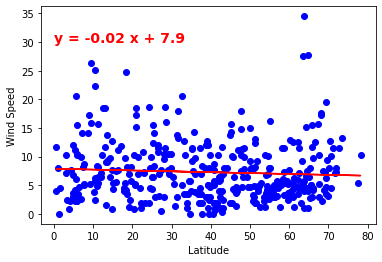

In [112]:
north_hem_wind = north_hem.iloc[:,6]
north_hem_lat = north_hem.iloc[:,1]
correlation = st.pearsonr(north_hem_wind,north_hem_lat)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = north_hem['Lat']
y_values = north_hem["Wind Speed"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(north_hem['Lat'],north_hem["Wind Speed"])
regress_values = north_hem['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(north_hem["Lat"],north_hem["Wind Speed"],color='b')
plt.plot(north_hem["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-0,30), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.09


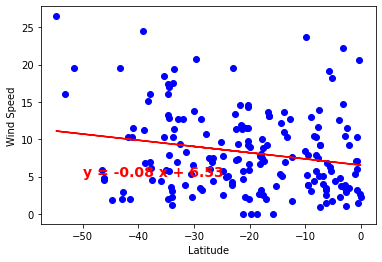

In [128]:
south_hem_cloud = south_hem.iloc[:,4]
south_hem_lat = south_hem.iloc[:,1]
correlation = st.pearsonr(south_hem_cloud,south_hem_lat)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = south_hem['Lat']
y_values = south_hem["Wind Speed"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(south_hem['Lat'],south_hem["Wind Speed"])
regress_values =south_hem['Lat']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(south_hem["Lat"],south_hem["Wind Speed"],color='b')
plt.plot(south_hem["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-50,5), fontsize=14, color="red",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()